#Importing packages


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage
from skimage import data



#Load data

In [ ]:
camera=data.camera() # load an example image from skimage
camera   #the loaded image will be represented as a NumPy array

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

In [ ]:
type(camera)

numpy.ndarray

In [ ]:
camera.shape

(512, 512)

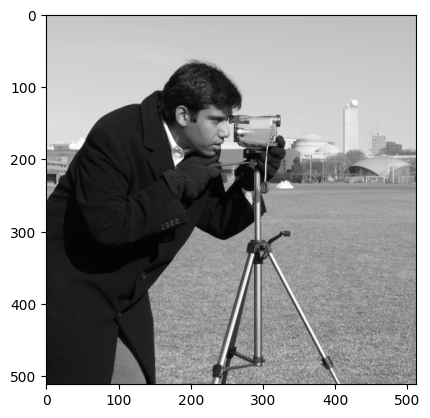

In [ ]:
#display the image
plt.imshow(camera, 'gray')

In [ ]:
#informations about the image
print("image shape array :%d x % d " %(camera.shape[0], camera.shape[1]   )  )
print("number of pixels :% d "  %(camera.size)  )
print("range of pixel:[% d, %d] " %(camera.min(), camera.max())  )
print('avg pixel value: %2f' %(camera.mean())) #computes the sum of all pixel values and divides it by the total number of pixels in the image.



image shape array :512 x  512 
number of pixels : 262144 
range of pixel:[ 0, 255] 
avg pixel value: 129.060726


#loading the image

In [ ]:
from skimage import io
colony = io.imread('/content/drive/MyDrive/Yeast_colonies_array.jpg')
print(type(colony))
print(colony.shape)

<class 'numpy.ndarray'>
(1257, 1846, 3)


Text(0.5, 1.0, 'all 3 channels')

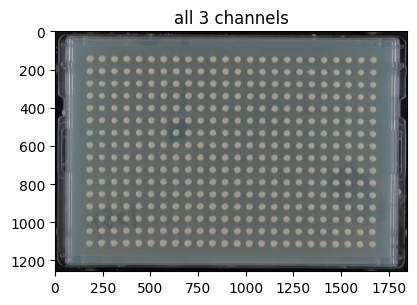

In [ ]:
plt.figure(figsize=(10,10))
#all channels
plt.subplot(121) #creates a subplot grid with 1 row and 2 columns and selects the first subplot as the current one
plt.imshow(colony[:,:,:])
plt.title('all 3 channels')


Text(0.5, 1.0, '1_channel')

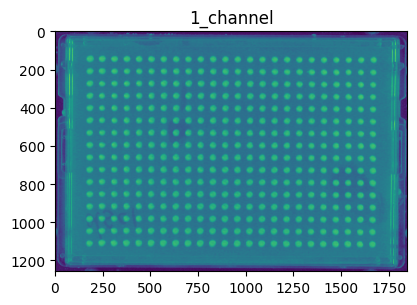

In [ ]:
# one channel
plt.figure(figsize=(10,10))
plt.subplot(122)
plt.imshow(colony[:,:,0])
plt.title('1_channel')

#Image Manipulation

**getting and setting pixel** **values**

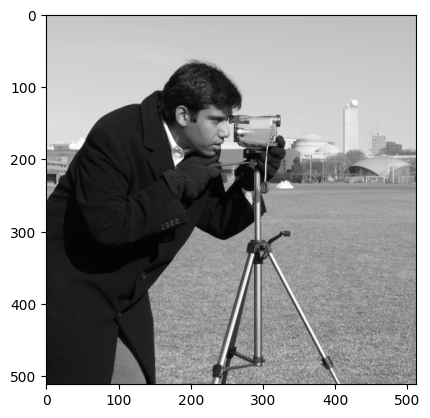

In [ ]:
camera=data.camera()
camera[10,10] #get the value of pixel in row 10 colum 10
plt.imshow(camera, "gray")

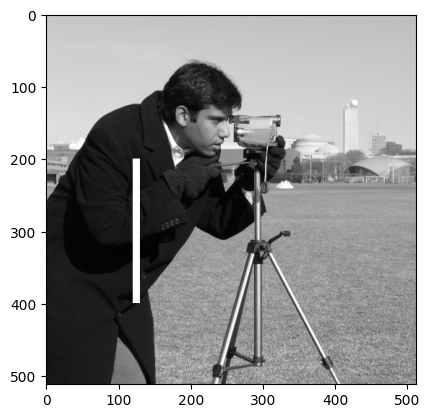

In [ ]:
camera[200:400,120:130]=255
plt.imshow(camera,'gray')

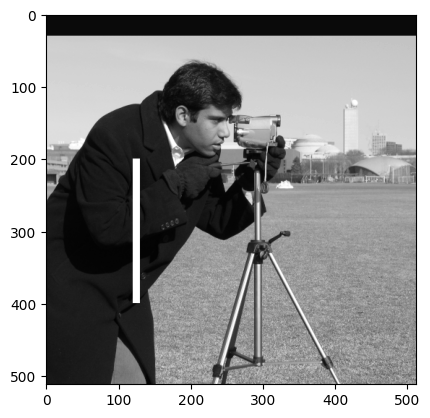

In [ ]:
#set the first 30 lines to black
camera[:30]=10
plt.imshow(camera,'gray')

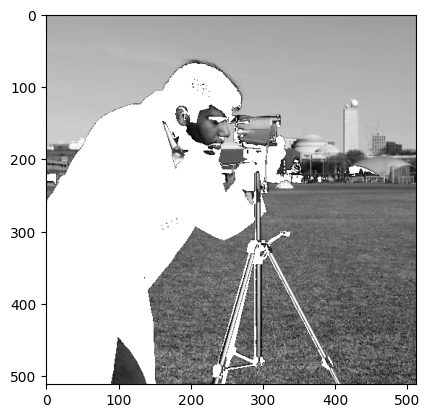

In [ ]:
#set to white pixels where a mask(threshold)is true
camera=data.camera()
mask=camera<87 # Pixels with values less than 87 will be set to True in the mask array, while pixels with values greater than or equal to 87 will be set to False
camera[mask]=255 # assigns a value of 255 (white) to the pixels in the camera
plt.imshow(camera,"gray")

#change the colours for real images

<class 'numpy.ndarray'>
(300, 451, 3)


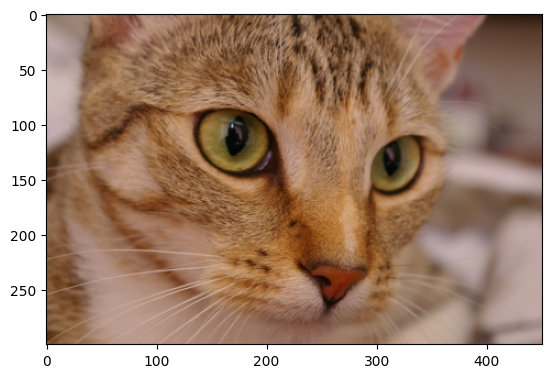

In [ ]:
cat=data.chelsea()
print(type(cat))
print(cat.shape)
plt.imshow(cat)

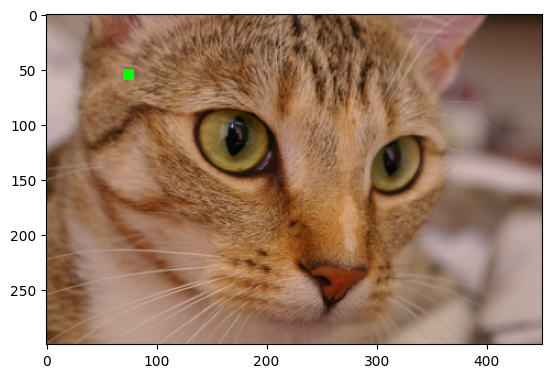

In [ ]:
#set a pixel to green
#[red,green,blue] defines the specific region of interest within the image.
cat[50:60,70:80]=[0,255,0] # the selected region will be assigned the color green.
plt.imshow(cat)

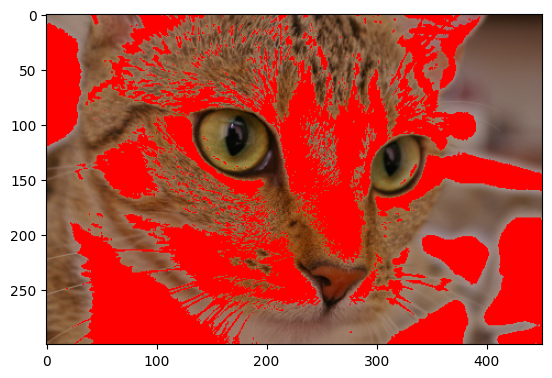

In [ ]:
# set brighter pixels to red
cat=data.chelsea()
red_cat=cat.copy()
reedish=cat[:,:,0]>160 # The red channel is accessed using the index 0
red_cat[reedish]=[255,0,0] # 255 intensity of pixels  for Red channel
plt.imshow(red_cat)

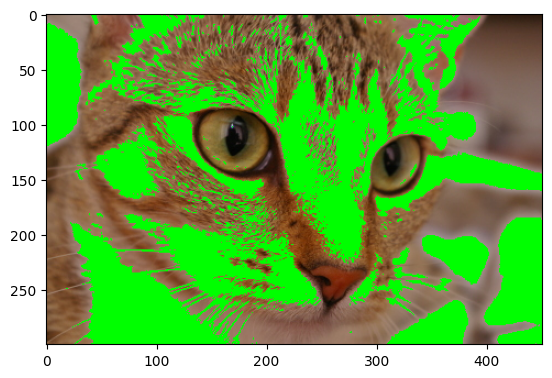

In [ ]:
# set brighter pixels to green
cat=data.chelsea()
red_cat=cat.copy()
reedish=cat[:,:,0]>160 # The green channel is accessed using the index 0
red_cat[reedish]=[0,255,0] # 255 intensity of pixels  for green channel
plt.imshow(red_cat)

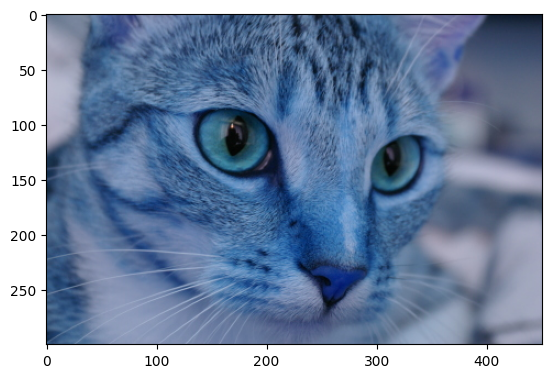

In [ ]:
# change RGB to BGR
cat=data.chelsea()
BGR_cat=cat[:,:,::-1] #by reversing the order of color channels in the cat image , image's color representation is changed from RGB (red, green, blue) to BGR (blue, green, red).
plt.imshow(BGR_cat)

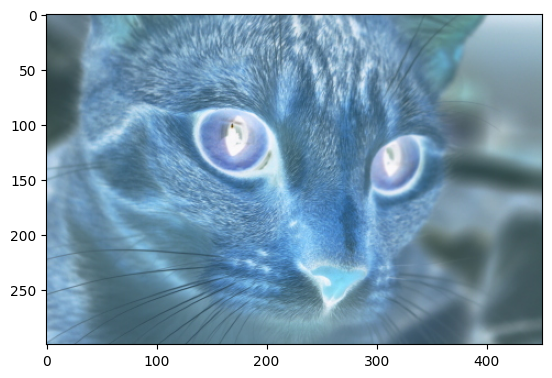

In [ ]:
#invert an image
from skimage import util # Invert the intensity range of the input image
invert_cat=util.invert(cat)
plt.imshow(invert_cat)

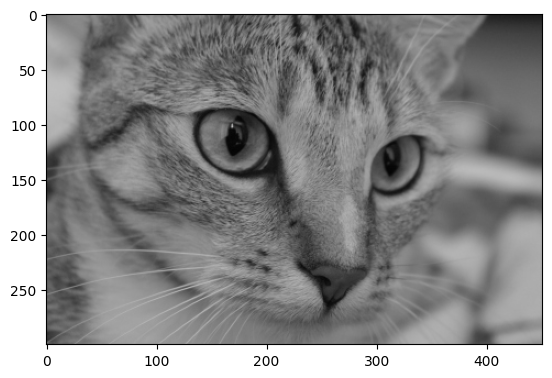

In [ ]:
#convert to and from RGB
from skimage.color import rgb2gray , gray2rgb #converting between RGB and grayscale color spaces.
gray_cat=rgb2gray(cat)
new_cat=gray2rgb(gray_cat) # converts the grayscale image gray_cat back to RGB
plt.imshow(gray_cat)
plt.imshow(new_cat)

#converting Image dtype

**img_as_float: convert to 64-bit floating point.**
**img_as_ubyte : convert to 8-bit uint**
**img_as_uint:convert to 16_bit uint**
**img_as_int:convert to 16-bit int.**

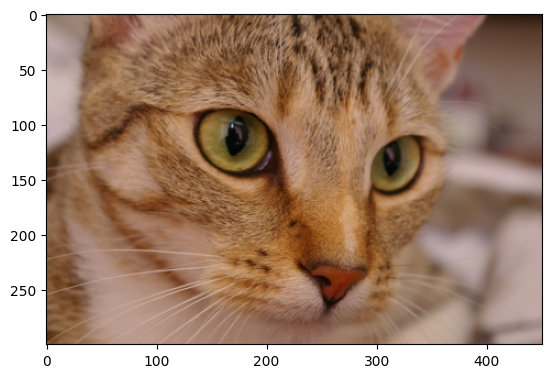

In [ ]:

from skimage import img_as_float , img_as_ubyte
float_cat=img_as_float(cat) #covert to 64-bit floating point
uint_cat=img_as_ubyte(float_cat) #convert to 8-bit uint
plt.imshow(uint_cat)




#Rescale Intensity

In [ ]:
from skimage  import exposure
rescale_cat=exposure.rescale_intensity(cat,in_range="uint8")
print("cat min:",cat.min(),"\t\tcat max:",cat.max()) #prints the minimum and maximum pixel values of the original cat image
print("rescale_cat min:",rescale_cat.min(),"\trescale_cat max:",rescale_cat.max()) #prints the minimum and maximum pixel values of the rescale_cat image after rescaling.

cat min: 0 		cat max: 231
rescale_cat min: 0 	rescale_cat max: 231


In [ ]:
rescale_cat=exposure.rescale_intensity(cat,in_range="uint10")
print("cat min:",cat.min(),"\t\tcat max:",cat.max()) #rints the minimum and maximum pixel values of the original cat image
print("rescale_cat min:",rescale_cat.min(),"\trescale_cat max:",rescale_cat.max()) #prints the minimum and maximum pixel values of the rescale_cat image after rescaling.




cat min: 0 		cat max: 231
rescale_cat min: 0 	rescale_cat max: 57


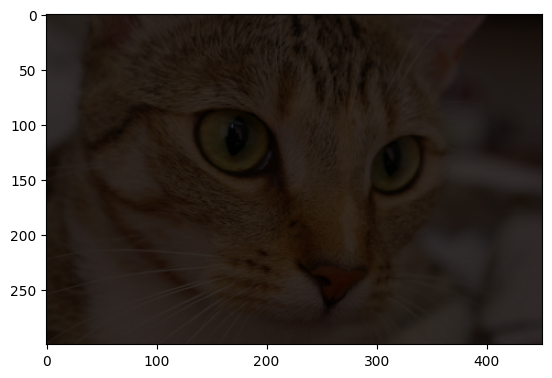

In [ ]:
plt.imshow(rescale_cat)

#Display image histograms

(array([35368., 38785.,  5713.,  4093.,  9626., 38530., 45402., 39344.,
        42553.,  2730.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

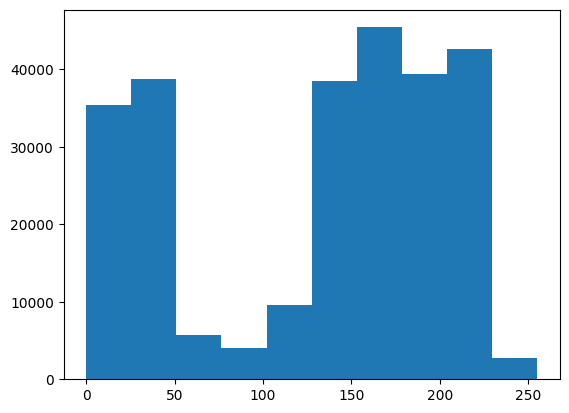

In [ ]:
img=data.camera()
plt.hist(img.ravel(), bins=None) # ravel:function is used to flatten the image into a 1D array, ensuring that all pixel values are considered for the histogram calculation

(array([1.000e+00, 1.000e+00, 2.000e+01, 6.080e+02, 2.680e+03, 2.944e+03,
        2.217e+03, 1.299e+03, 9.660e+02, 8.780e+02, 7.820e+02, 6.970e+02,
        7.310e+02, 6.960e+02, 7.170e+02, 7.470e+02, 7.350e+02, 8.700e+02,
        1.064e+03, 1.208e+03, 1.378e+03, 1.723e+03, 2.129e+03, 2.826e+03,
        3.500e+03, 3.951e+03, 4.627e+03, 4.957e+03, 4.825e+03, 4.366e+03,
        3.501e+03, 2.618e+03, 2.082e+03, 1.672e+03, 1.376e+03, 1.076e+03,
        9.510e+02, 7.260e+02, 6.860e+02, 6.020e+02, 4.990e+02, 4.890e+02,
        4.310e+02, 4.540e+02, 4.540e+02, 4.470e+02, 4.180e+02, 4.190e+02,
        4.140e+02, 3.820e+02, 3.130e+02, 3.270e+02, 3.140e+02, 2.880e+02,
        2.990e+02, 2.670e+02, 2.990e+02, 2.830e+02, 2.500e+02, 2.300e+02,
        2.390e+02, 2.170e+02, 2.030e+02, 2.010e+02, 2.080e+02, 1.740e+02,
        2.200e+02, 1.780e+02, 1.830e+02, 1.690e+02, 1.670e+02, 1.490e+02,
        1.840e+02, 1.590e+02, 1.700e+02, 1.800e+02, 1.550e+02, 1.590e+02,
        1.590e+02, 1.530e+02, 1.530e+0

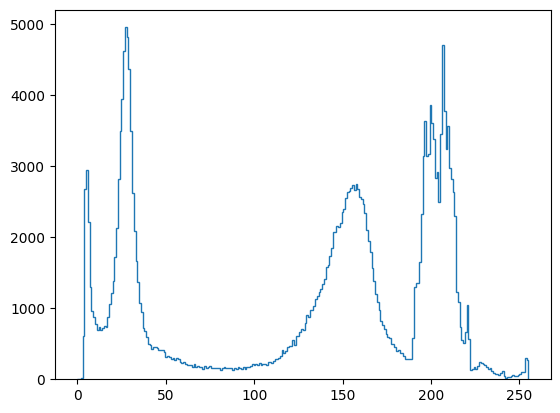

In [ ]:
plt.hist(img.ravel() , bins=256 , histtype='step')#The bins parameter is set to 256,histtype: which determines the number of bins (intensity levels) to use for the histogram # specifies that the histogram will be plotted as a step function

#Image segmentation

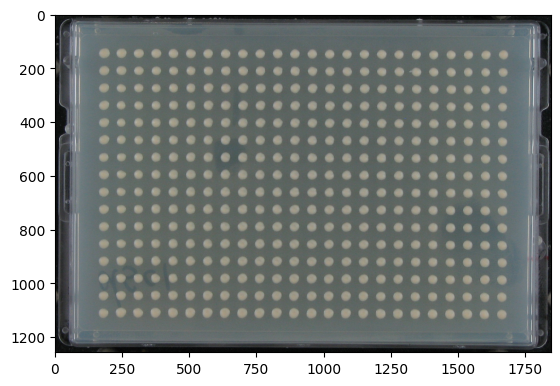

In [ ]:
#use colony image
colony=io.imread('/content/drive/MyDrive/Yeast_colonies_array.jpg')
plt.imshow(colony)

(array([6.00000e+01, 6.00000e+01, 1.09000e+02, 1.66000e+02, 3.21000e+02,
        7.43000e+02, 1.39100e+03, 2.40500e+03, 1.40100e+03, 4.11200e+03,
        4.94200e+03, 6.02600e+03, 6.41000e+03, 7.02600e+03, 7.04300e+03,
        6.48400e+03, 5.87400e+03, 5.75200e+03, 5.25100e+03, 4.74700e+03,
        4.28500e+03, 3.38700e+03, 3.15900e+03, 2.23800e+03, 2.52900e+03,
        2.01900e+03, 1.85900e+03, 1.48100e+03, 1.45300e+03, 1.33900e+03,
        1.33700e+03, 1.21500e+03, 1.29100e+03, 1.27400e+03, 1.23200e+03,
        1.13400e+03, 1.12600e+03, 1.27000e+03, 1.17900e+03, 1.31800e+03,
        1.25500e+03, 1.49100e+03, 1.51900e+03, 1.77600e+03, 1.89500e+03,
        2.06800e+03, 2.11200e+03, 2.62100e+03, 2.82800e+03, 3.12300e+03,
        3.23500e+03, 3.31100e+03, 3.54000e+03, 3.39100e+03, 3.72100e+03,
        3.98600e+03, 4.06400e+03, 3.79900e+03, 4.16100e+03, 4.21600e+03,
        4.22400e+03, 3.76600e+03, 3.97600e+03, 3.44500e+03, 3.46000e+03,
        3.10000e+03, 3.03000e+03, 2.76200e+03, 2.52

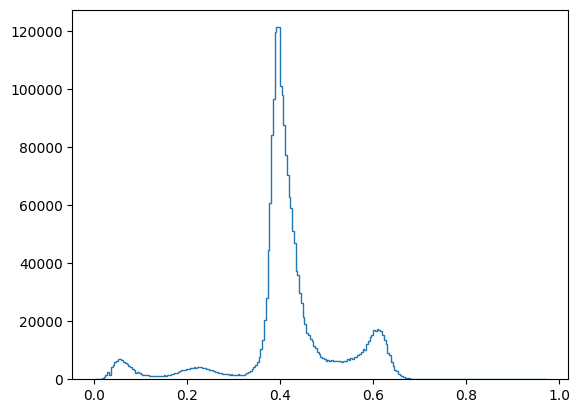

In [ ]:
#convert the image to gray
from skimage.color import rgb2gray,gray2rgb
gray_colony=rgb2gray(colony)
plt.hist(gray_colony.ravel(), bins=256 , histtype='step')


Text(0.5, 1.0, 'gray_colony with threshold')

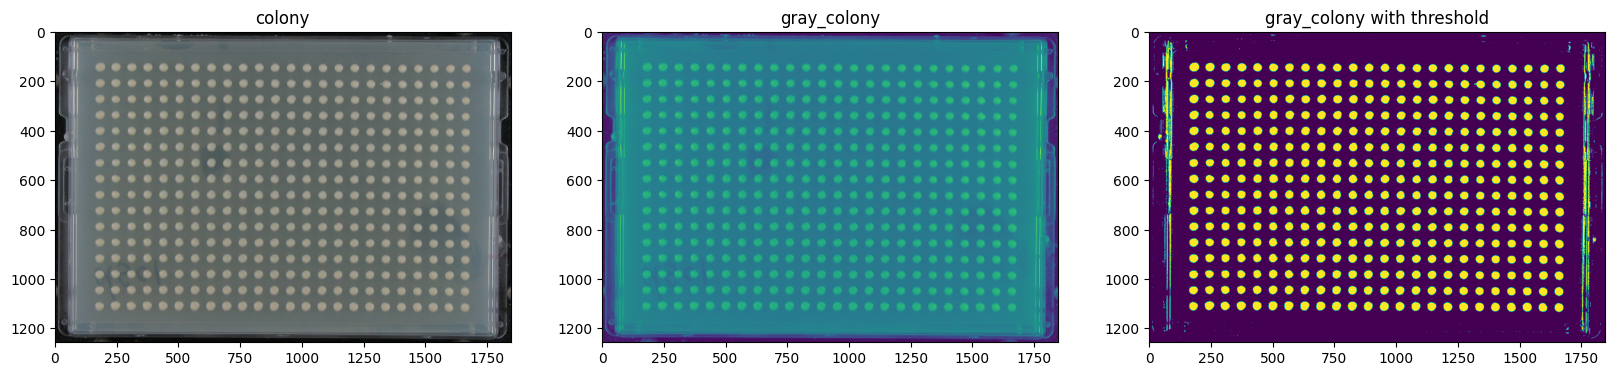

In [ ]:
plt.figure(figsize=(20,30))
plt.subplot(131)
plt.imshow(colony)
plt.title('colony')


plt.subplot(132)
plt.imshow(gray_colony)
plt.title('gray_colony')


plt.subplot(133)
plt.imshow(gray_colony>0.5)
plt.title('gray_colony with threshold')





#Edge detector

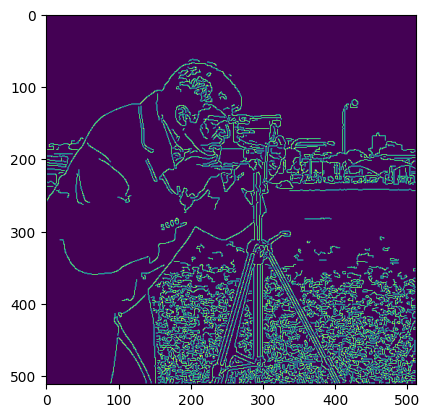

In [ ]:
#we can use the detection of high contrast regions

from skimage.feature import canny
img_edge=canny(img)  #canny:identifies edges in an image based on changes in intensity
plt.imshow(img_edge)



In [ ]:
import scipy.ndimage as ndi
img_edge=canny(img)
img_filled=ndi.binary_fill_holes(img_edge)#the holes are filled with white pixels

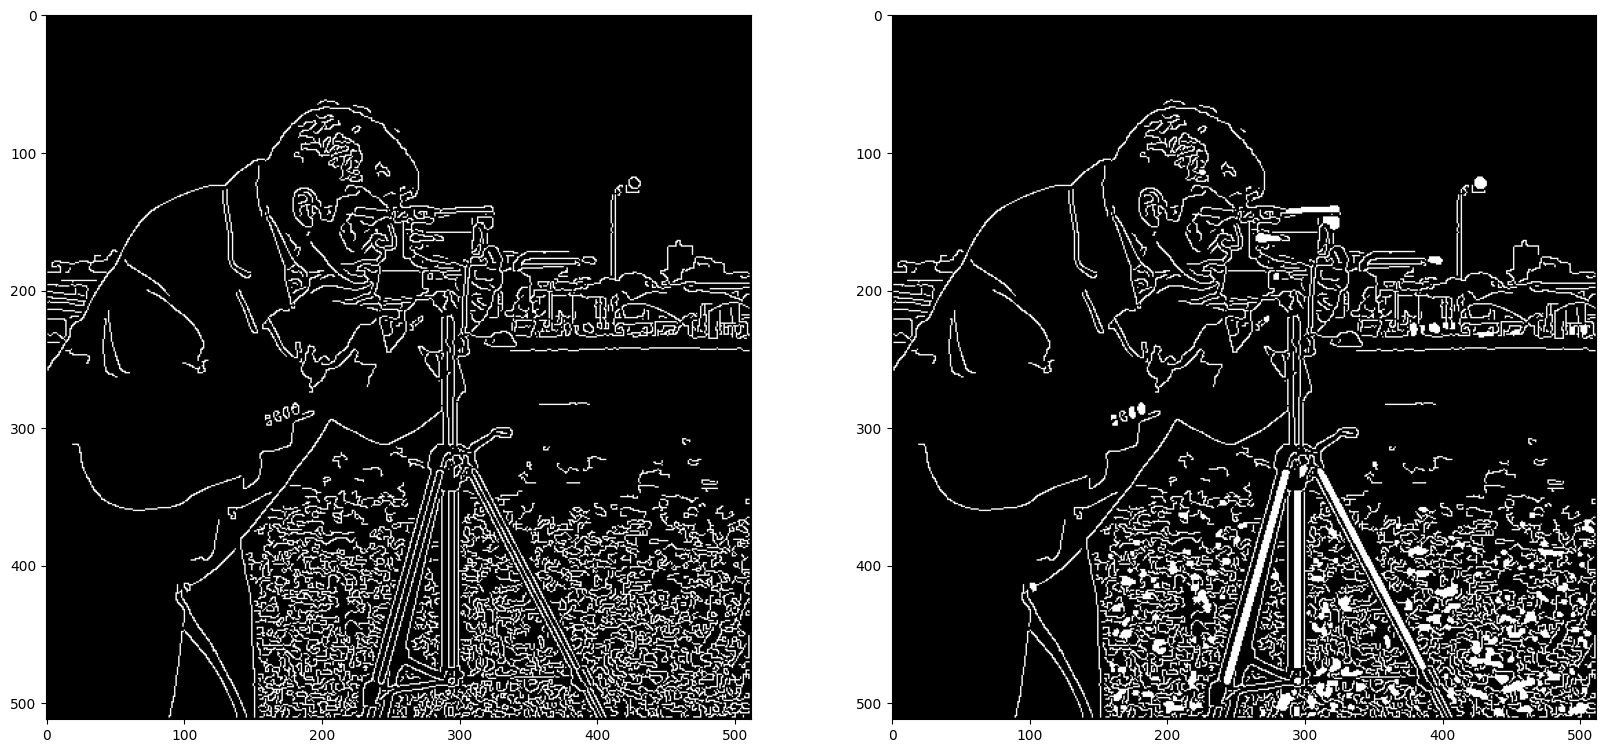

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img_edge,"gray")
plt.subplot(122)
plt.imshow(img_filled,"gray")

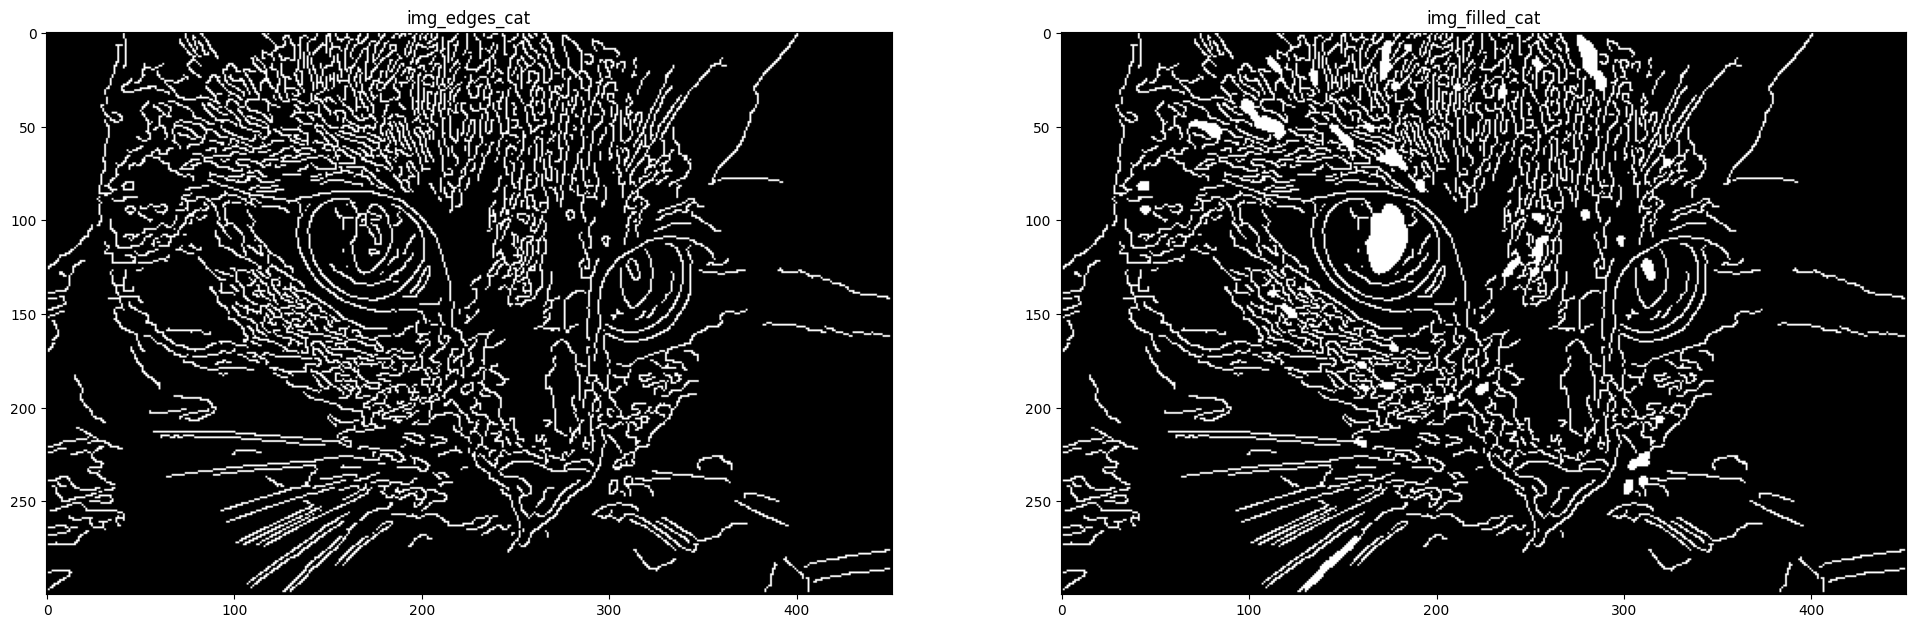

In [ ]:
#canny edge detector on cat
from skimage.feature import canny
cat=data.chelsea()
img_edges_cat=canny(cat[:,:,0]/255)
img_filled_cat=ndi.binary_fill_holes(img_edges_cat)
plt.figure(figsize=(24,18))
plt.subplot(121)
plt.title("img_edges_cat")
plt.imshow(img_edges_cat,"gray")
plt.subplot(122)
plt.title("img_filled_cat")
plt.imshow(img_filled_cat,"gray")

#watershed Algorithm

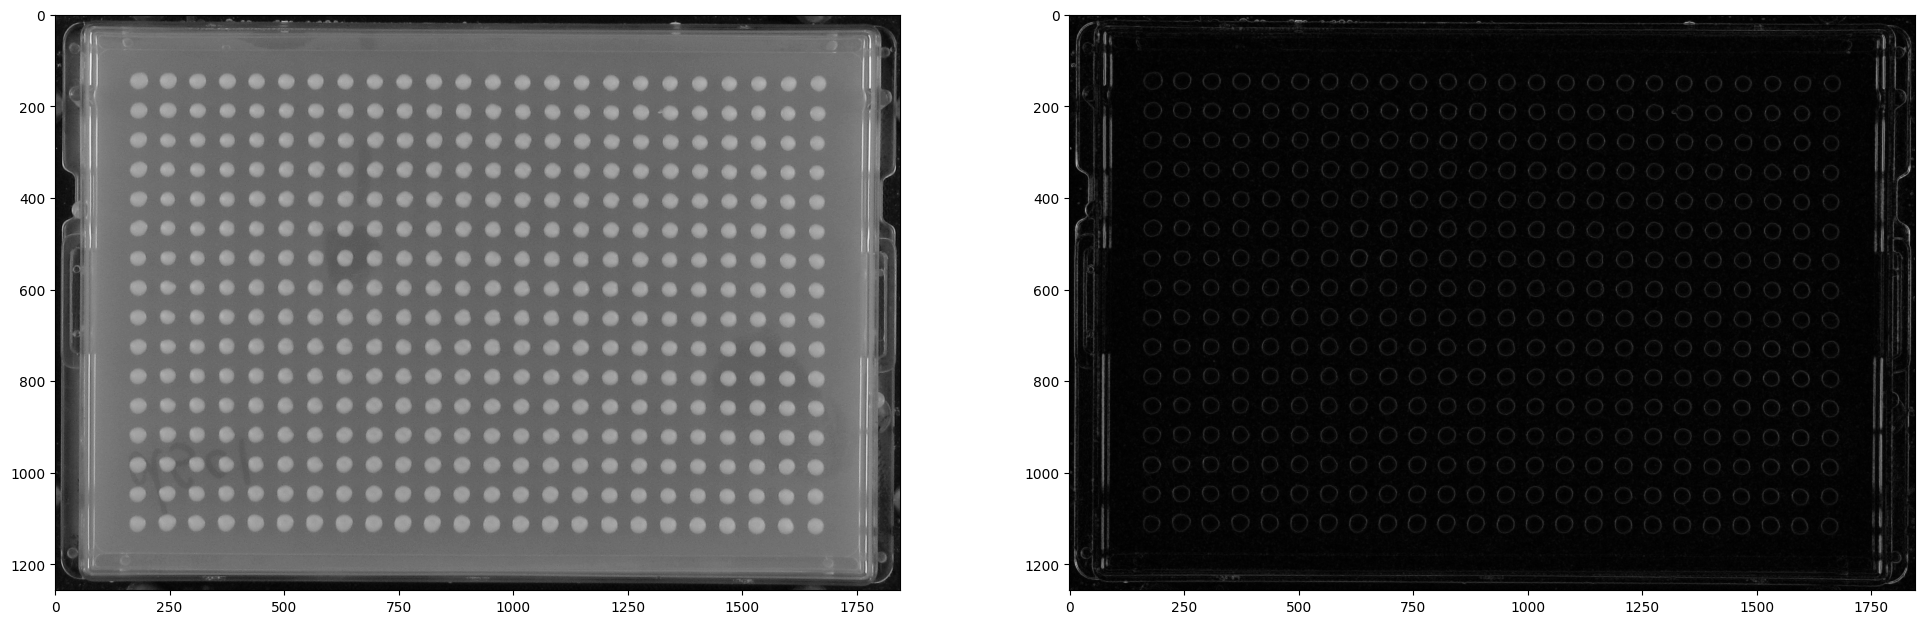

In [ ]:
from skimage.filters import sobel
from skimage.segmentation import watershed
#evaluation map
evaluation_map=sobel(gray_colony) #gray_colony is 2dim array however colony is a 3 dim array
plt.figure(figsize=(24,18))
plt.subplot(121)
plt.imshow(gray_colony,"gray")
plt.subplot(122)
plt.imshow(evaluation_map,'gray')


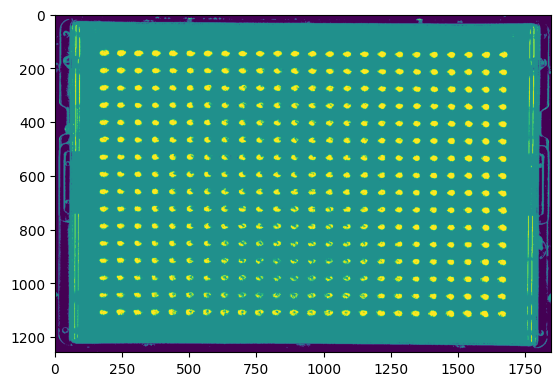

In [ ]:
#separate pixels into 3 classes
# algorithms uses user define markers
markers=np.zeros_like(gray_colony)
markers[gray_colony>0.3]=1 # This step separates the pixels with intensity values above the threshold of 0.3 into one class.
markers[gray_colony>0.6]=2
plt.imshow(markers)

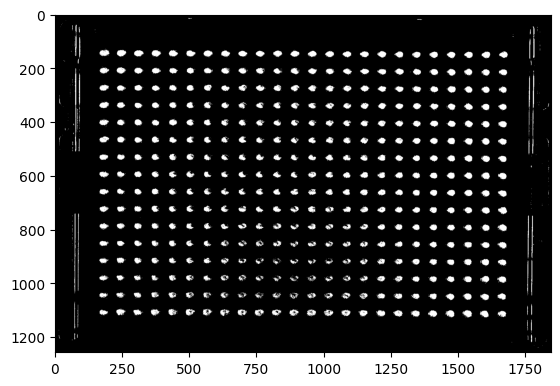

In [ ]:
#segmentation with watershed transform
segmentation=watershed(evaluation_map,markers) #treats the intensity values in the evaluation map as a topographic map and the markers as seeds to separate the image into regions.
segmentation[segmentation==0]=0 #This step ensures that the background pixels are displayed as black in the final visualization.
plt.imshow(segmentation,"gray")

#label segmentation  object

1


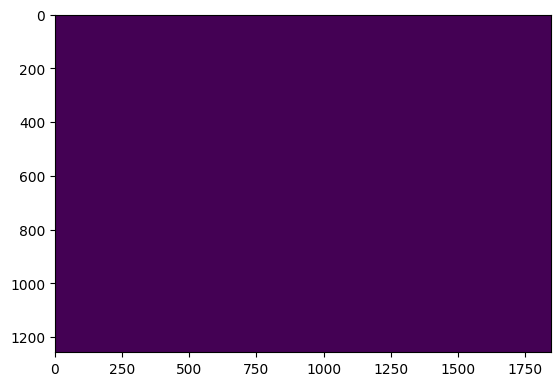

In [ ]:
#label segmentation object
label_colony,number=ndi.label(gray_colony) #the total number of labeled components is assigned to the number variable
print(number)       #The label() function assigns a unique label to each connected component in the image
plt.imshow(label_colony)